# Lab 2 Data Analysis of U.S. Electric Vehicle Data

## Data Source

This data is sourced from: [https://catalog.data.gov/dataset/electric-vehicle-population-data]

# View Data

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-lab-1-bucket/Electric_Vehicle_Population_Data.csv') # load the data from my bucket
df.head() #show the top 5 rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [2]:
df.shape #show the shape of the data set

(257635, 17)

In [3]:
df.info() #Gives detailed info about what the data container has

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257635 entries, 0 to 257634
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         257635 non-null  object 
 1   County                                             257627 non-null  object 
 2   City                                               257627 non-null  object 
 3   State                                              257635 non-null  object 
 4   Postal Code                                        257627 non-null  float64
 5   Model Year                                         257635 non-null  int64  
 6   Make                                               257635 non-null  object 
 7   Model                                              257635 non-null  object 
 8   Electric Vehicle Type                              257635 non-null  object

In [4]:
df.describe #Gives basic statistics about the data set overall

<bound method NDFrame.describe of         VIN (1-10)     County          City State  Postal Code  Model Year  \
0       5YJ3E1EB5K     Yakima        Yakima    WA      98901.0        2019   
1       1C4RJXU67R     Kitsap  Port Orchard    WA      98367.0        2024   
2       KNDCD3LD0N  Snohomish      Lynnwood    WA      98036.0        2022   
3       5UXKT0C37H       King        Auburn    WA      98001.0        2017   
4       1N4AZ0CP1D     Skagit  Mount Vernon    WA      98273.0        2013   
...            ...        ...           ...   ...          ...         ...   
257630  2C4RC1L73L  Snohomish      Mukilteo    WA      98275.0        2020   
257631  7SAYGDEE8N       King      Kirkland    WA      98033.0        2022   
257632  WBAJB1C53K      Clark     Vancouver    WA      98683.0        2019   
257633  JTDKARFP9K    Whatcom    Bellingham    WA      98229.0        2019   
257634  7YAKRDDC1S       King       Seattle    WA      98121.0        2025   

            Make             

## Evaluation/First Impressions

This data set consists of 17 columns and 257,635 rows, making it extremely large. The columns conist of manily qualitative data, but there are a couple quatitative columns. Overall, this is a very nicely organizted data set, with probably not a lot of missing entries.

# Cleaning the Data

In [5]:
df.isnull().sum() #Check how many missing cells there are

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 597
DOL Vehicle ID                                         0
Vehicle Location                                      16
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Finished Data Cleaning
Using the df.dropna() function is removed any of the missing values from the dataset, so there would not be any complications. I decieded not to rename any of the columns since they were all nicely organized and named already.

In [7]:
df['Model Year'] #Selected column by Model Year

0         2019
1         2024
2         2022
3         2017
4         2013
          ... 
257630    2020
257631    2022
257632    2019
257633    2019
257634    2025
Name: Model Year, Length: 257027, dtype: int64

In [8]:
df.sort_values(by='Model') #Sort data by model

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
95471,3MW5P9J07M,King,Redmond,WA,98052.0,2021,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,0.0,45.0,144516550,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
218647,WBA8E1C57G,Whatcom,Ferndale,WA,98248.0,2016,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,43700.0,42.0,128781418,POINT (-122.5945 48.84787),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
25220,WBA8E1C35H,Mason,Belfair,WA,98528.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,44100.0,35.0,250417023,POINT (-122.82802 47.44998),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
121211,WBA8E1C57J,King,Seattle,WA,98119.0,2018,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,45600.0,36.0,104553844,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
72220,WBA5P9C02N,Clark,Ridgefield,WA,98642.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,18.0,239731257,POINT (-122.74595 45.81539),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118231,2G5ZJ3HG8P,King,Seatac,WA,98148.0,2023,BRIGHTDROP,ZEVO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,281868506,POINT (-122.32863 47.46233),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
114776,2G5ZJ3HG7P,King,Seatac,WA,98148.0,2023,BRIGHTDROP,ZEVO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,282678973,POINT (-122.32863 47.46233),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
112118,2G5ZJ3HG2P,King,Seatac,WA,98148.0,2023,BRIGHTDROP,ZEVO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,281812954,POINT (-122.32863 47.46233),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
103469,2G5ZJ3TZ9R,King,Auburn,WA,98002.0,2024,BRIGHTDROP,ZEVO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,47.0,275027602,POINT (-122.2217 47.30661),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [9]:
df[0:5] #Slice rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [10]:
df[df['Electric Range']>20] #Sorted by condition based on Electric Range over 20 miles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10
5,1N4BZ0CP8G,Snohomish,Marysville,WA,98270.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,44.0,256278109,POINT (-122.1769 48.06114),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257624,5YJ3E1EB4J,Whatcom,Bellingham,WA,98229.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,40.0,473977087,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
257625,WBY8P2C52K,Snohomish,Everett,WA,98208.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,44.0,260212564,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
257626,5YJ3E1EB5L,Spokane,Spokane,WA,99212.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,4.0,4783222,POINT (-117.28805 47.68043),BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATI...,5.306301e+10
257630,2C4RC1L73L,Snohomish,Mukilteo,WA,98275.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,21.0,161576068,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10


## Visualizations

In [21]:
Electric_Range_by_Model_Year = df.groupby('Model Year')['Electric Range'].mean() #Create summary for visualizations
Electric_Range_by_Model_Year.head()

Model Year
2000     58.000000
2002     95.000000
2003     95.000000
2008    209.000000
2010    231.818182
Name: Electric Range, dtype: float64

<Axes: xlabel='Model Year'>

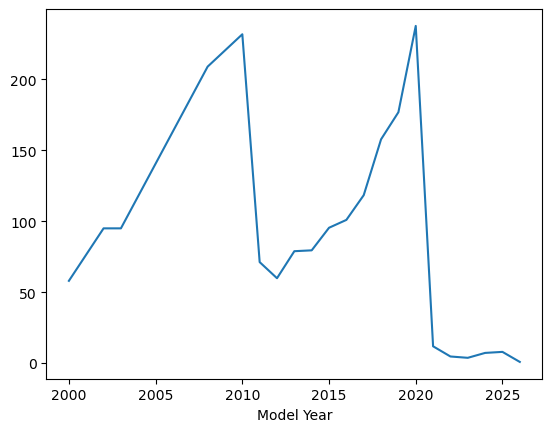

In [22]:
Electric_Range_by_Model_Year.plot()

In [20]:
Electric_Range_by_Make = df.groupby('Make')['Electric Range'].mean() #Create summary for second visualization
Electric_Range_by_Make.head()

Make
ACURA              0.000000
ALFA ROMEO        33.000000
AUDI              37.738761
AZURE DYNAMICS    56.000000
BENTLEY           31.250000
Name: Electric Range, dtype: float64

<Axes: xlabel='Make'>

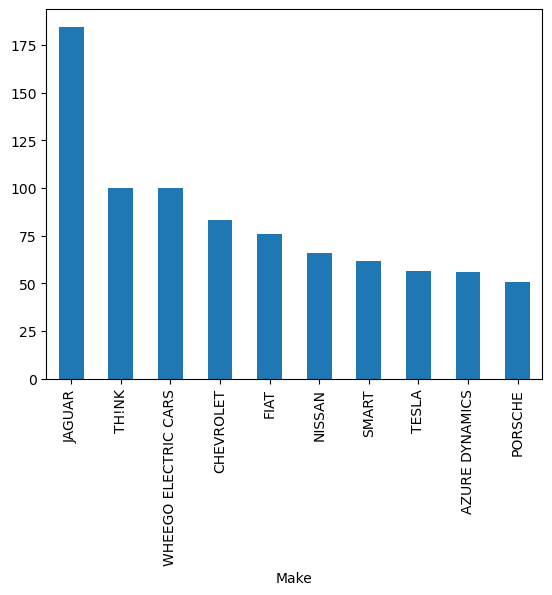

In [25]:
Electric_Range_by_Make.nlargest(10).plot.bar()

## Plot Evaluation

# Plot 1 (Line)
This plot is based upon the average electrical vehilce range based upon the year the car was made. Where from the graph it seems as though as time has gone on the average range has gone down. Though that could be due to all the information overall has not been reported for the 2025 year.

# Plot 2 (Bar)
This plot is based upon the average electric